In [2]:
from datetime import datetime as dt

import pandas as pd

from analsis.analsis_utils.plot_utils import plot_performance_vs_target_performance_bar_plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

blues = ["#63bff0", "#a7d5ed", "#0d88e6", ]
rads = ["#ea5545", "#e1a692", "#b30000", ]

In [5]:
base_path = '/Volumes/noamaz/modularity'
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
plots_path = f'{local_base_path}/plots/retina_from_label_to_arch_to_label/genetic_sampling'

time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

task_name = 'retina'
num_features = 10
results_base_path = f"{base_path}/teach_archs/{task_name}"
results_path = f'{results_base_path}/{task_name}_teach_archs_requiered_features_genetic/{num_features}_features'

res_csv_name_no_duplicates = '2023-07-27-10-59-07_all_results_combined_no_duplicates.csv'
res_no_duplicates = pd.read_csv(f"{results_path}/{res_csv_name_no_duplicates}")



In [7]:
required_performance_max = float(res_no_duplicates['required_performance_max'].iloc[0])
required_performance_min = float(res_no_duplicates['required_performance_min'].iloc[0])
required_performance_diff = required_performance_max - required_performance_min

In [8]:
num = 10
bin_range = np.arange(
    required_performance_min - (1 * required_performance_diff),
    required_performance_max + (1 * required_performance_diff),
    required_performance_diff / num,
)

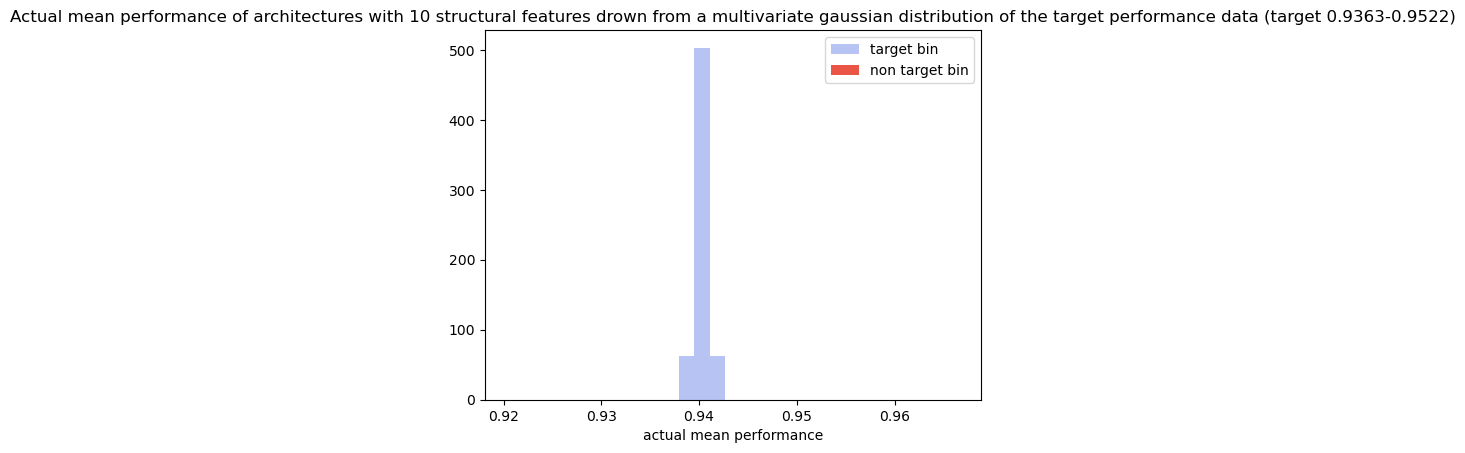

In [10]:

num_stds = None
fig = plt.figure()
ax = fig.add_subplot(111, )
n, bins, patches = ax.hist(
    x=res_no_duplicates['mean_performance'].astype(float),
    bins=bin_range,
    color='#ea5545',
    density=True
)
for i in range(num, num * 2):
    patches[i].set_facecolor('#B7C3F3')
h = [Patch(facecolor='#B7C3F3', label='Color Patch'), patches]
ax.legend(h, ['target bin', 'non target bin', ])
plt.xlabel('actual mean performance')
str_addition = ''
if num_stds:
    str_addition = f'(distance from mean < {num_stds} stds) '
plt.title(
    f'Actual mean performance of architectures with {num_features} structural features drown from a multivariate gaussian '
    f'distribution {str_addition}of the target performance data (target {round(required_performance_min, 4)}-'
    f'{round(required_performance_max, 4)})',
    wrap=True,
)
plt.savefig(
    f'{plots_path}/{time_str}_predicted_mean_performance_of_arch_from_multi_gaussian_'
    f'{num_features}_features.png')
plt.show()


In [178]:
results_base_path = f"{base_path}/teach_archs/{task_name}"
results_path = f'{results_base_path}/{task_name}_teach_archs_requiered_features_genetic'

task_name = 'retina'

top_and = '5_features/2023-07-16-14-36-06_all_results_combined_no_dop.csv'
top_xor = '5_features/2023-07-17-13-15-08_all_results_on_xor_retina_combined_no_duplicates.csv'
bottom_xor = '5_features_bottom_performance/2023-07-26-15-44-29_all_results_on_xor_retina_combined_no_duplicates.csv'
bottom_and = '5_features_bottom_performance/2023-07-26-13-28-03_all_results_combined_no_duplicates.csv'

res_top_and = pd.read_csv(f"{results_path}/{top_and}")
res_top_xor = pd.read_csv(f"{results_path}/{top_xor}")
res_bottom_xor = pd.read_csv(f"{results_path}/{bottom_xor}")
res_bottom_and = pd.read_csv(f"{results_path}/{bottom_and}")

In [185]:
bottom_required_performance_min, bottom_required_performance_max = (0.753002197265625, 0.8163546142578125)
required_performance_diff_bottom = bottom_required_performance_max - bottom_required_performance_min

num = 10
bin_range = np.arange(
    bottom_required_performance_min - (2 * required_performance_diff_bottom),
    bottom_required_performance_max + (2 * required_performance_diff_bottom),
    required_performance_diff_bottom / num,
)
bin_range[20]

0.7530021972656246

In [186]:
k = np.where(bin_range.round(decimals=5, out=None) == round(bottom_required_performance_min,5))[0].item()
j = np.where(bin_range.round(decimals=5, out=None) == round(bottom_required_performance_max,5))[0].item()

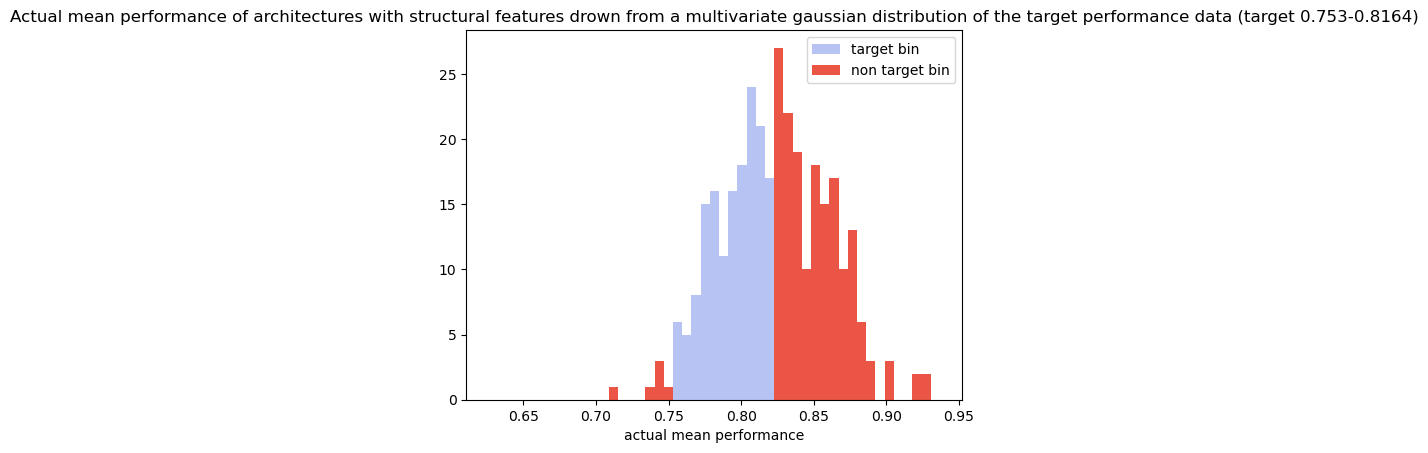

In [189]:
num_stds = None
fig = plt.figure()
ax = fig.add_subplot(111, )
n, bins, patches = ax.hist(
    x=res_bottom_and['mean_performance'].astype(float),
    bins=bin_range,
    color='#ea5545',
)
for i in range(k  , j+1):
    patches[i].set_facecolor('#B7C3F3')
h = [Patch(facecolor='#B7C3F3', label='Color Patch'), patches]
ax.legend(h, ['target bin', 'non target bin', ])
plt.xlabel('actual mean performance')
str_addition = ''
if num_stds:
    str_addition = f'(distance from mean < {num_stds} stds) '
plt.title(
    f'Actual mean performance of architectures with structural features drown from a multivariate gaussian '
    f'distribution {str_addition}of the target performance data (target {round(bottom_required_performance_min, 4)}-'
    f'{round(bottom_required_performance_max, 4)})',
    wrap=True,
)
plt.savefig(
    f'{plots_path}/{time_str}_actual_mean_performance_of_bottom_arch_from_multi_gaussian_'
    f'{num_features}_features.png')
plt.show()


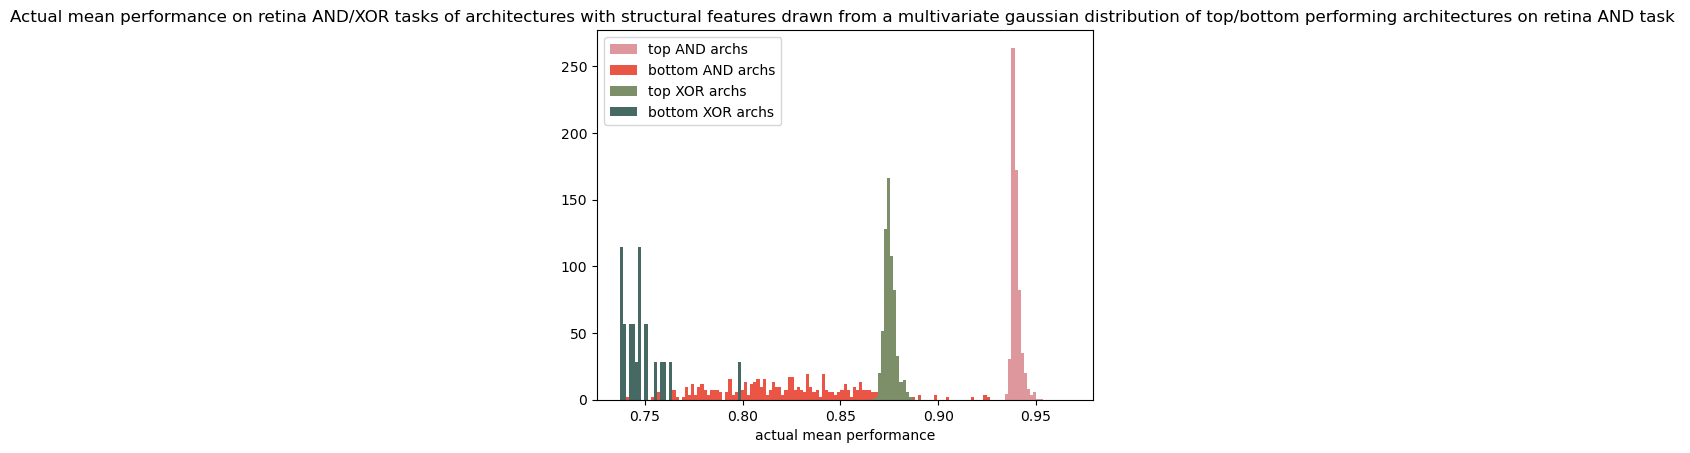

In [183]:
pinks = ["#df979e", "#e4bcad", '#c80064']
sage = ["#7d8f69", "#a9af7e", "#557153", ]
rads = ["#ea5545", "#e1a692", "#b30000", ]
greens = ['green', "#466964", "#48b5c4", "#3c4e4b"]
bottom_required_performance_min, bottom_required_performance_max = (0.753002197265625, 0.8163546142578125)
top_required_performance_min = 0.9363038330078125
top_required_performance_max = 0.9522058715820313
required_performance_diff = top_required_performance_max - top_required_performance_min
num = 10
bin_range = np.arange(
    bottom_required_performance_min - (1 * required_performance_diff),
    top_required_performance_max + (1 * required_performance_diff),
    required_performance_diff / num,
)
res_tabels = [res_top_and, res_bottom_and, res_top_xor, res_bottom_xor]
colors = ['#df979e', '#ea5545', '#7d8f69', '#466964', ]
labels = ['top AND archs', 'bottom AND archs', 'top XOR archs', 'bottom XOR archs', ]
fig = plt.figure()
ax = fig.add_subplot(111, )
for res_table, c, l in zip(res_tabels, colors, labels):
    ax.hist(
        x=res_table['mean_performance'].astype(float),
        bins=bin_range,
        color=c,
        label=l,
        density=True,
    )
ax.set_xlabel('actual mean performance')
ax.legend()
plt.title(
    f'Actual mean performance on retina AND/XOR tasks of architectures with structural features drawn from a '
    f'multivariate gaussian distribution of top/bottom performing architectures on retina AND task ',
    wrap=True,
)
plt.savefig(
    f'{plots_path}/{time_str}_actual_mean_performance_of_arch_from_multi_gaussian_'
    f'{num_features}_top_bottom_xor_and_retina.png')


In [ ]:
mean_mean_performance_top_and = res_top_and['mean_performance'].mean()
mean_mean_performance_top_xor = res_top_xor['mean_performance'].mean()
mean_mean_performance_bottom_xor = res_bottom_xor['mean_performance'].mean()
mean_mean_performance_bottom_and = res_bottom_and['mean_performance'].mean()
std_mean_performance_top_and = res_top_and['mean_performance'].std()
std_mean_performance_top_xor = res_top_xor['mean_performance'].std()
std_mean_performance_bottom_xor = res_bottom_xor['mean_performance'].std()
std_mean_performance_bottom_and = res_bottom_and['mean_performance'].std()

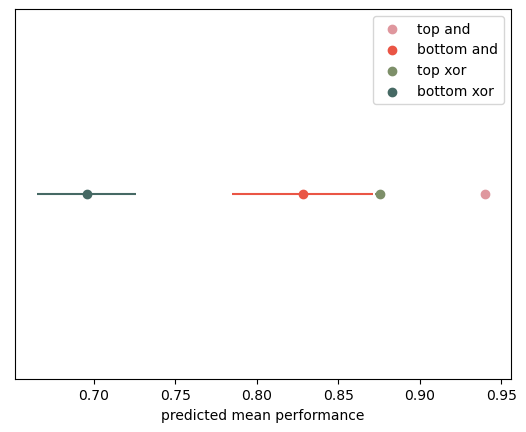

In [63]:
plt.scatter(mean_mean_performance_top_and, 1,
            color='#df979e',
            label='top and',
            )
plt.errorbar(mean_mean_performance_top_and, 1,
             xerr=std_mean_performance_top_and,
             color='#df979e',
             )
plt.scatter(mean_mean_performance_bottom_and, 1,
            color='#ea5545',
            label='bottom and',
            )
plt.errorbar(mean_mean_performance_bottom_and, 1,
             xerr=std_mean_performance_bottom_and,
             color='#ea5545',
             )
plt.scatter(mean_mean_performance_top_xor, 1,
            color='#7d8f69',
            label='top xor',
            )
plt.errorbar(mean_mean_performance_top_xor, 1,
             xerr=std_mean_performance_top_xor,
             color='#7d8f69',
             )
plt.scatter(mean_mean_performance_bottom_xor, 1,
            color='#466964',
            label='bottom xor',
            )
plt.errorbar(mean_mean_performance_bottom_xor, 1,
             xerr=std_mean_performance_bottom_xor,
             color='#466964',
             )
plt.xlabel('predicted mean performance')
plt.yticks([])
plt.legend()

0.9363541666666668
0.7164583333333333
0.8696354166666667
0.6379166666666667


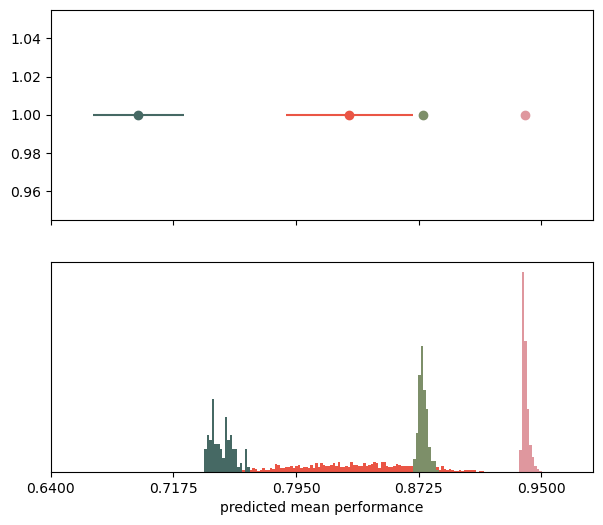

In [68]:
bottom_required_performance_min, bottom_required_performance_max = (0.753002197265625, 0.8163546142578125)
top_required_performance_min = 0.9363038330078125
top_required_performance_max = 0.9522058715820313
required_performance_diff = top_required_performance_max - top_required_performance_min
num = 10
bin_range = np.arange(
    bottom_required_performance_min - (1 * required_performance_diff),
    top_required_performance_max + (1 * required_performance_diff),
    required_performance_diff / num,
)
fig, (ax1, ax2,) = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
res_tabels = [res_top_and, res_bottom_and, res_top_xor, res_bottom_xor]
colors = ['#df979e', '#ea5545', '#7d8f69', '#466964', ]
labels = ['top AND archs', 'bottom AND archs', 'top XOR archs', 'bottom XOR archs', ]
min_x = 1
max_x = 0
for res_table, c, label in zip(res_tabels, colors, labels):
    res_table = res_table[res_table['mean_performance'].between(
        res_table['mean_performance'].quantile(0.01),
        res_table['mean_performance'].quantile(0.99)
    )]

    std_res = res_table['mean_performance'].std()
    mean_res = res_table['mean_performance'].mean()
    ax2.hist(
        x=res_table['mean_performance'].astype(float),
        bins=bin_range,
        color=c,
        label=label,
        density=True,
    )
    ax1.scatter(mean_res, 1,
                color=c,
                label=label,
                )
    ax1.errorbar(mean_res, 1,
                 xerr=std_res,
                 color=c,
                 )
    print(res_table['mean_performance'].min())
    min_x = np.min([mean_res, mean_res - std_res, min_x, res_table['mean_performance'].min()])
    max_x = np.max([mean_res, mean_res + std_res, max_x, res_table['mean_performance'].max()])
plt.xlabel('predicted mean performance')
plt.xticks(np.linspace(round(min_x, 2), round(max_x,2), 5))
ax2.set_yticks([])
ax.legend()

0.6954888001962568